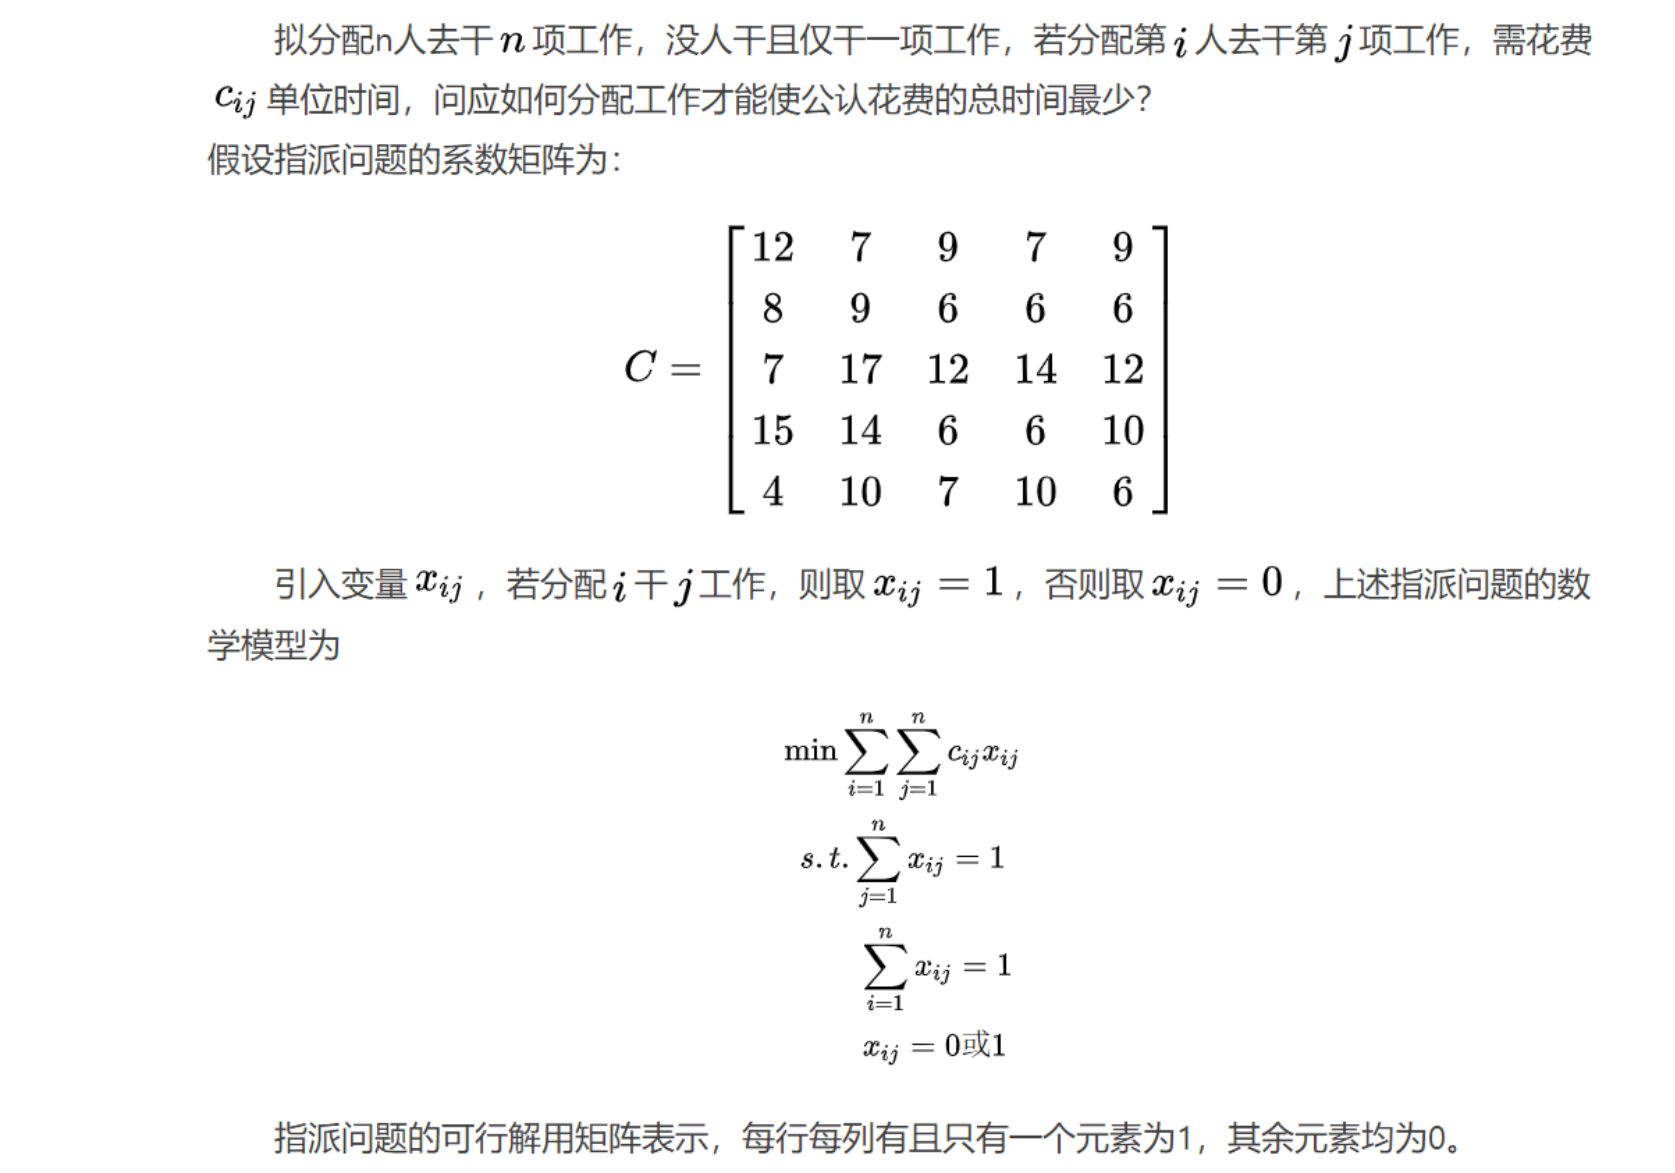

In [3]:
import pulp

In [4]:
def assignment_problem(efficiency_matrix):
    row = len(efficiency_matrix)
    col = len(efficiency_matrix[0])

    def flatten(x): return [y for l in x for y in flatten(
        l)] if type(x) is list else [x]

    m = pulp.LpProblem('assignment', sense=pulp.LpMinimize)
    var_x = [[pulp.LpVariable(f'x{i}{j}', cat=pulp.LpBinary)
              for j in range(col)] for i in range(row)]

    m += pulp.lpDot(efficiency_matrix.flatten(), flatten(var_x))

    for i in range(row):
        m += (pulp.lpDot(var_x[i], [1]*col) == 1)

    for j in range(col):
        m += (pulp.lpDot([var_x[i][j] for i in range(row)], [1]*row) == 1)

    m.solve()

    print(m)

    return {'objective': pulp.value(m.objective), 'var': [[pulp.value(var_x[i][j]) for j in range(col)] for i in range(row)]}

In [5]:
efficiency_matrix = np.array([
    [12, 7, 9, 7, 9],
    [8, 9, 6, 6, 6],
    [7, 17, 12, 14, 9],
    [15, 14, 6, 6, 10],
    [4, 10, 7, 10, 9]
])

res = assignment_problem(efficiency_matrix)
print(f'最小值{res["objective"]}')
print(res['var'])

#output
#最小值32.0
#[[0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0]]

assignment:
MINIMIZE
12*x00 + 7*x01 + 9*x02 + 7*x03 + 9*x04 + 8*x10 + 9*x11 + 6*x12 + 6*x13 + 6*x14 + 7*x20 + 17*x21 + 12*x22 + 14*x23 + 9*x24 + 15*x30 + 14*x31 + 6*x32 + 6*x33 + 10*x34 + 4*x40 + 10*x41 + 7*x42 + 10*x43 + 9*x44 + 0
SUBJECT TO
_C1: x00 + x01 + x02 + x03 + x04 = 1

_C2: x10 + x11 + x12 + x13 + x14 = 1

_C3: x20 + x21 + x22 + x23 + x24 = 1

_C4: x30 + x31 + x32 + x33 + x34 = 1

_C5: x40 + x41 + x42 + x43 + x44 = 1

_C6: x00 + x10 + x20 + x30 + x40 = 1

_C7: x01 + x11 + x21 + x31 + x41 = 1

_C8: x02 + x12 + x22 + x32 + x42 = 1

_C9: x03 + x13 + x23 + x33 + x43 = 1

_C10: x04 + x14 + x24 + x34 + x44 = 1

VARIABLES
0 <= x00 <= 1 Integer
0 <= x01 <= 1 Integer
0 <= x02 <= 1 Integer
0 <= x03 <= 1 Integer
0 <= x04 <= 1 Integer
0 <= x10 <= 1 Integer
0 <= x11 <= 1 Integer
0 <= x12 <= 1 Integer
0 <= x13 <= 1 Integer
0 <= x14 <= 1 Integer
0 <= x20 <= 1 Integer
0 <= x21 <= 1 Integer
0 <= x22 <= 1 Integer
0 <= x23 <= 1 Integer
0 <= x24 <= 1 Integer
0 <= x30 <= 1 Integer
0 <= x31 <= 1 